# Fitting Data

In [1]:
import numpy as np

In [2]:
# Reading data
f = open("3.data", "r")
D = np.loadtxt(f)

## Task A

The first two moments of $\mathcal{D}$:

In [3]:
# First moment of D
m1 = np.sum(D) / D.size
m1

6.496145618324817

In [4]:
# Second moment of D
m2 = np.sum(np.square(D)) / D.size
m2

46.554361807879815

## Task B

Compute a histogram of the dataset and plot it.

In [5]:
import matplotlib.pyplot as plt

# Params
plt.rcParams['font.family'] = 'Cambria'

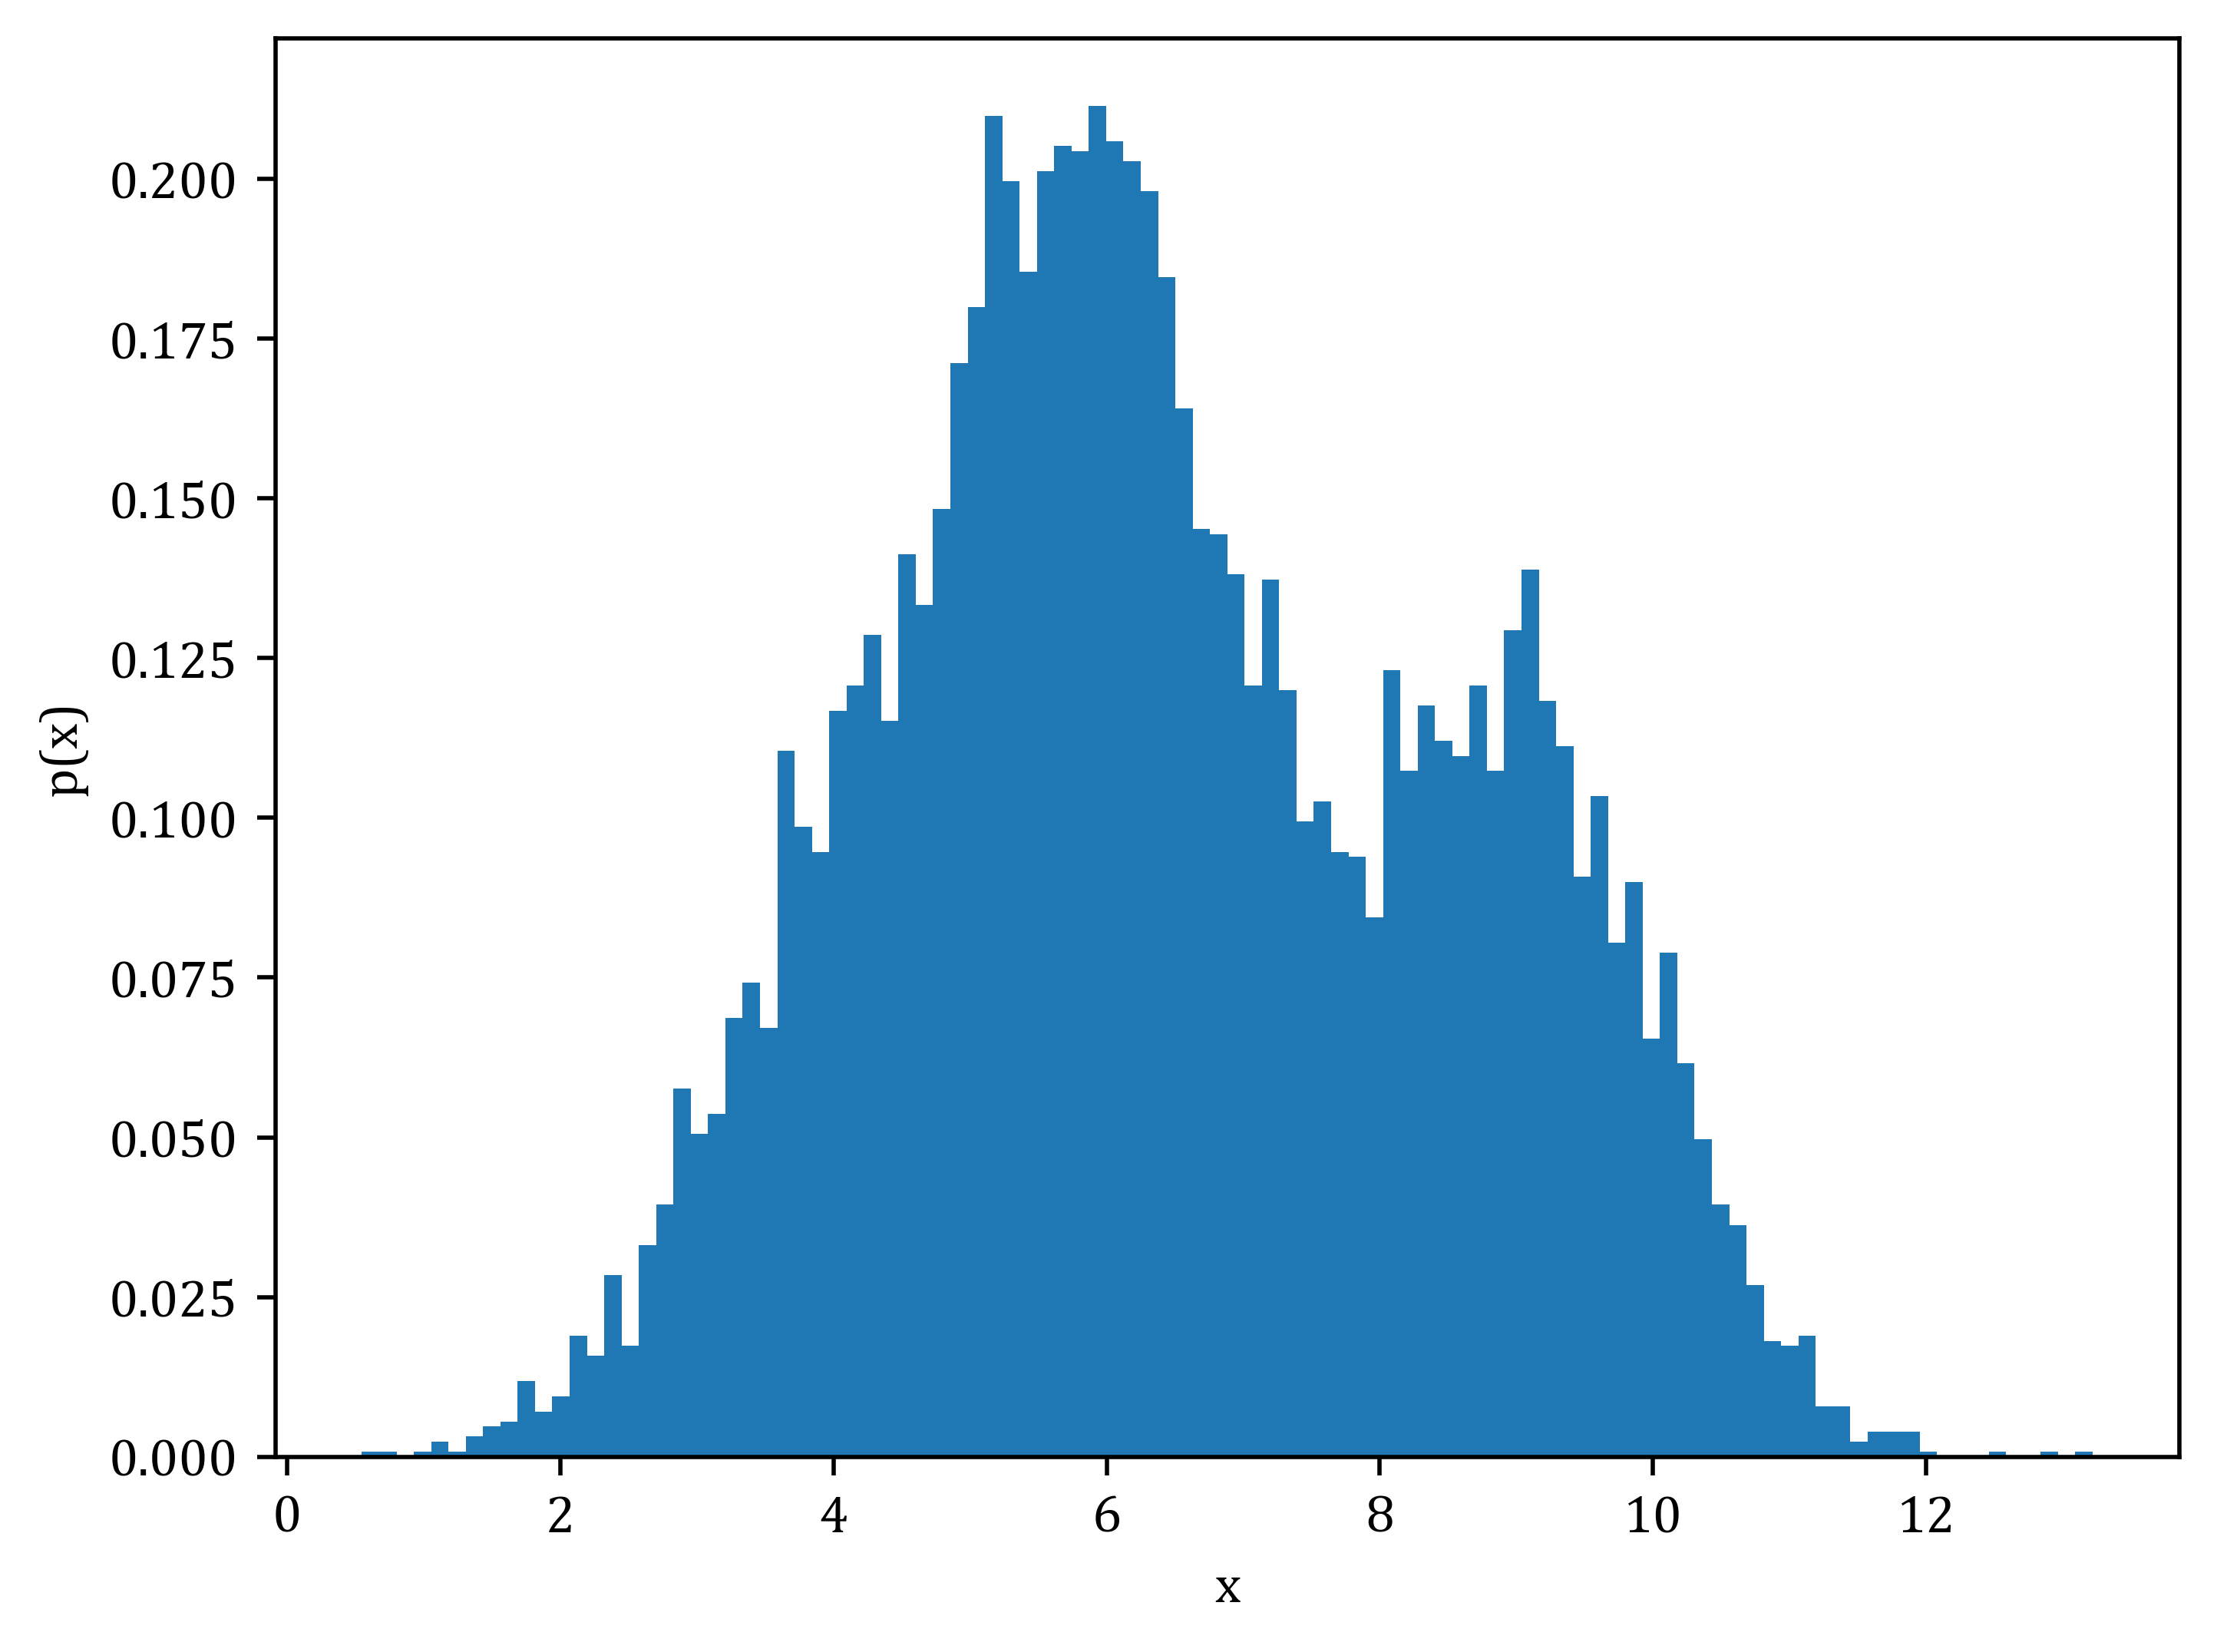

In [6]:
plt.figure(dpi=500)
plt.hist(D, 100, density=True)
plt.xlabel("x")
plt.ylabel("p(x)")

plt.show()

# plt.savefig("3b.png")
# plt.close()

# Guess of mu: ~7

## Task C

Binomial fit

In [7]:
import scipy

[19.70400679  0.32968653] 20 0.3296865296375705


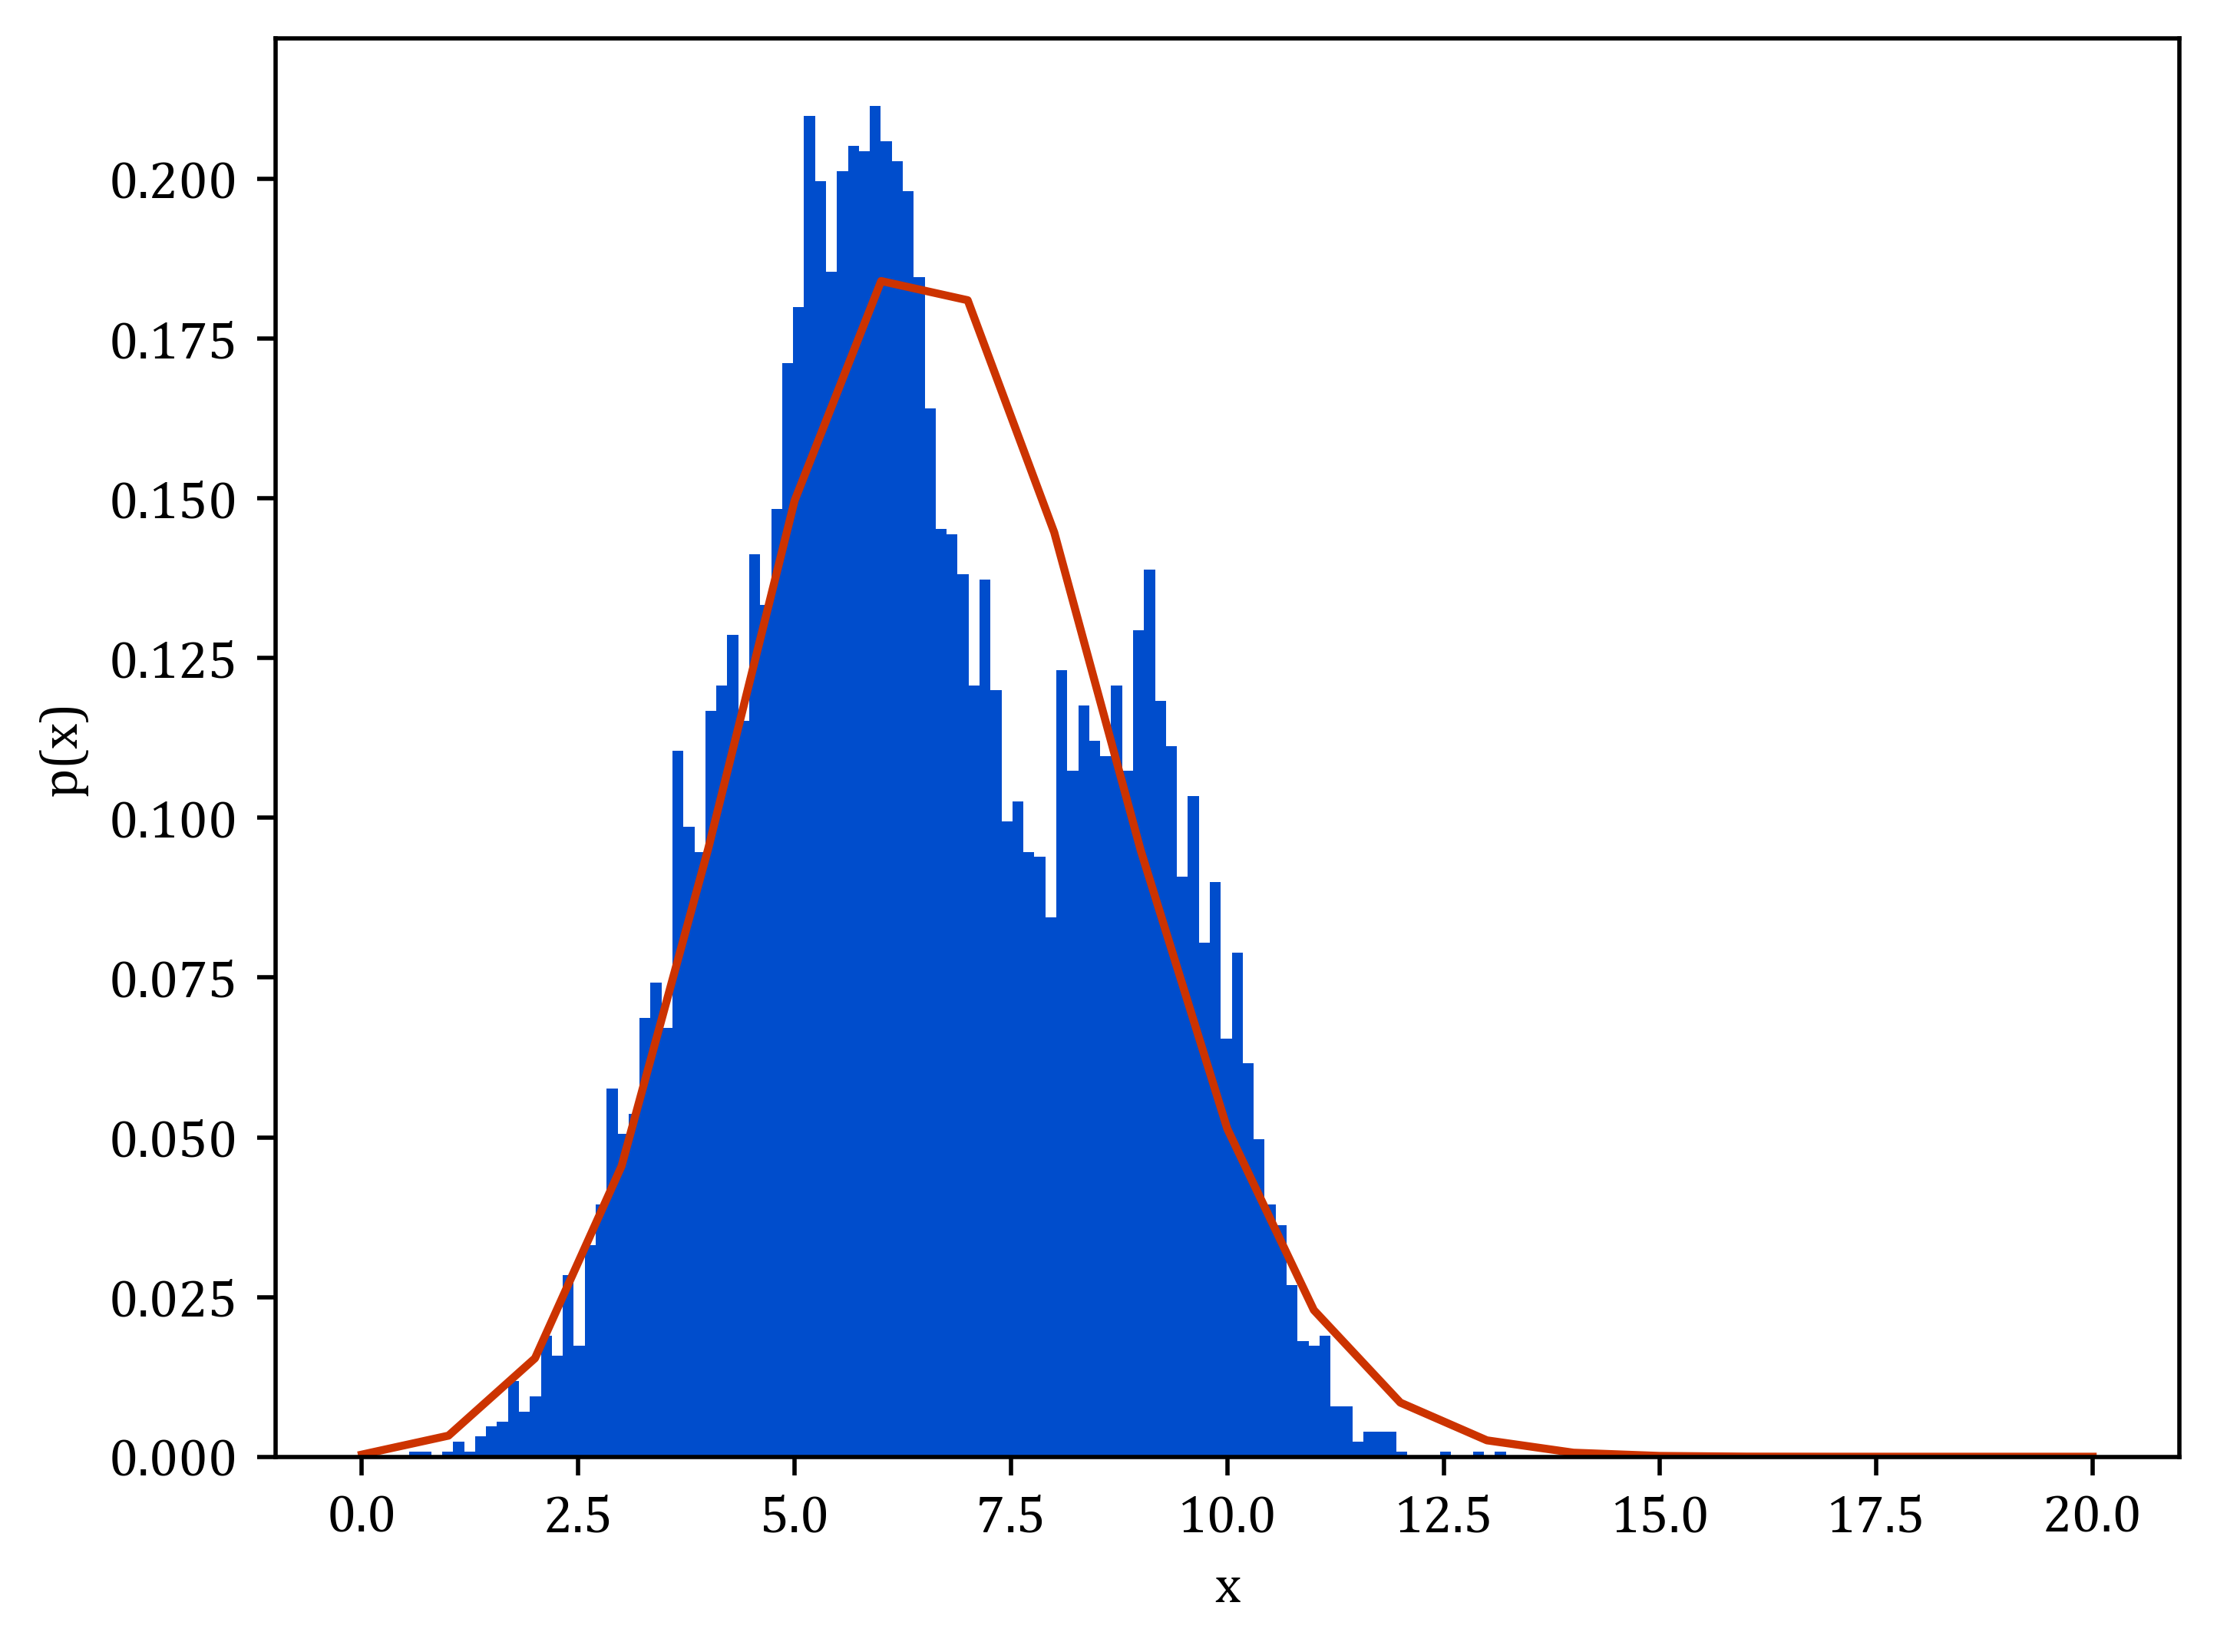

In [8]:
def func_c(x):
    return [x[0] * x[1] - m1, x[0] * x[1] + x[0] * (x[0] - 1) * x[1] * x[1] - m2]


est = np.array([1, 0])

root = scipy.optimize.fsolve(func_c, est)
n = round(root[0])
p = root[1]
print(root, n, p)

var = np.linspace(0, 20, 21)
binomial_fit = scipy.stats.binom.pmf(var, n, p)

plt.figure(dpi=500)
plt.plot(var, binomial_fit, color=(0.8, 0.2, 0))
plt.hist(D, 100, density=True, histtype="bar", color=(0, 0.3, 0.8))
plt.xlabel("x")
plt.ylabel("p(x)")

plt.show()

# plt.savefig("3c.png")
# plt.close()

## Task D

Gamma fit

[9.69120554 0.67031347] 9.691205541218812 0.6703134703624697


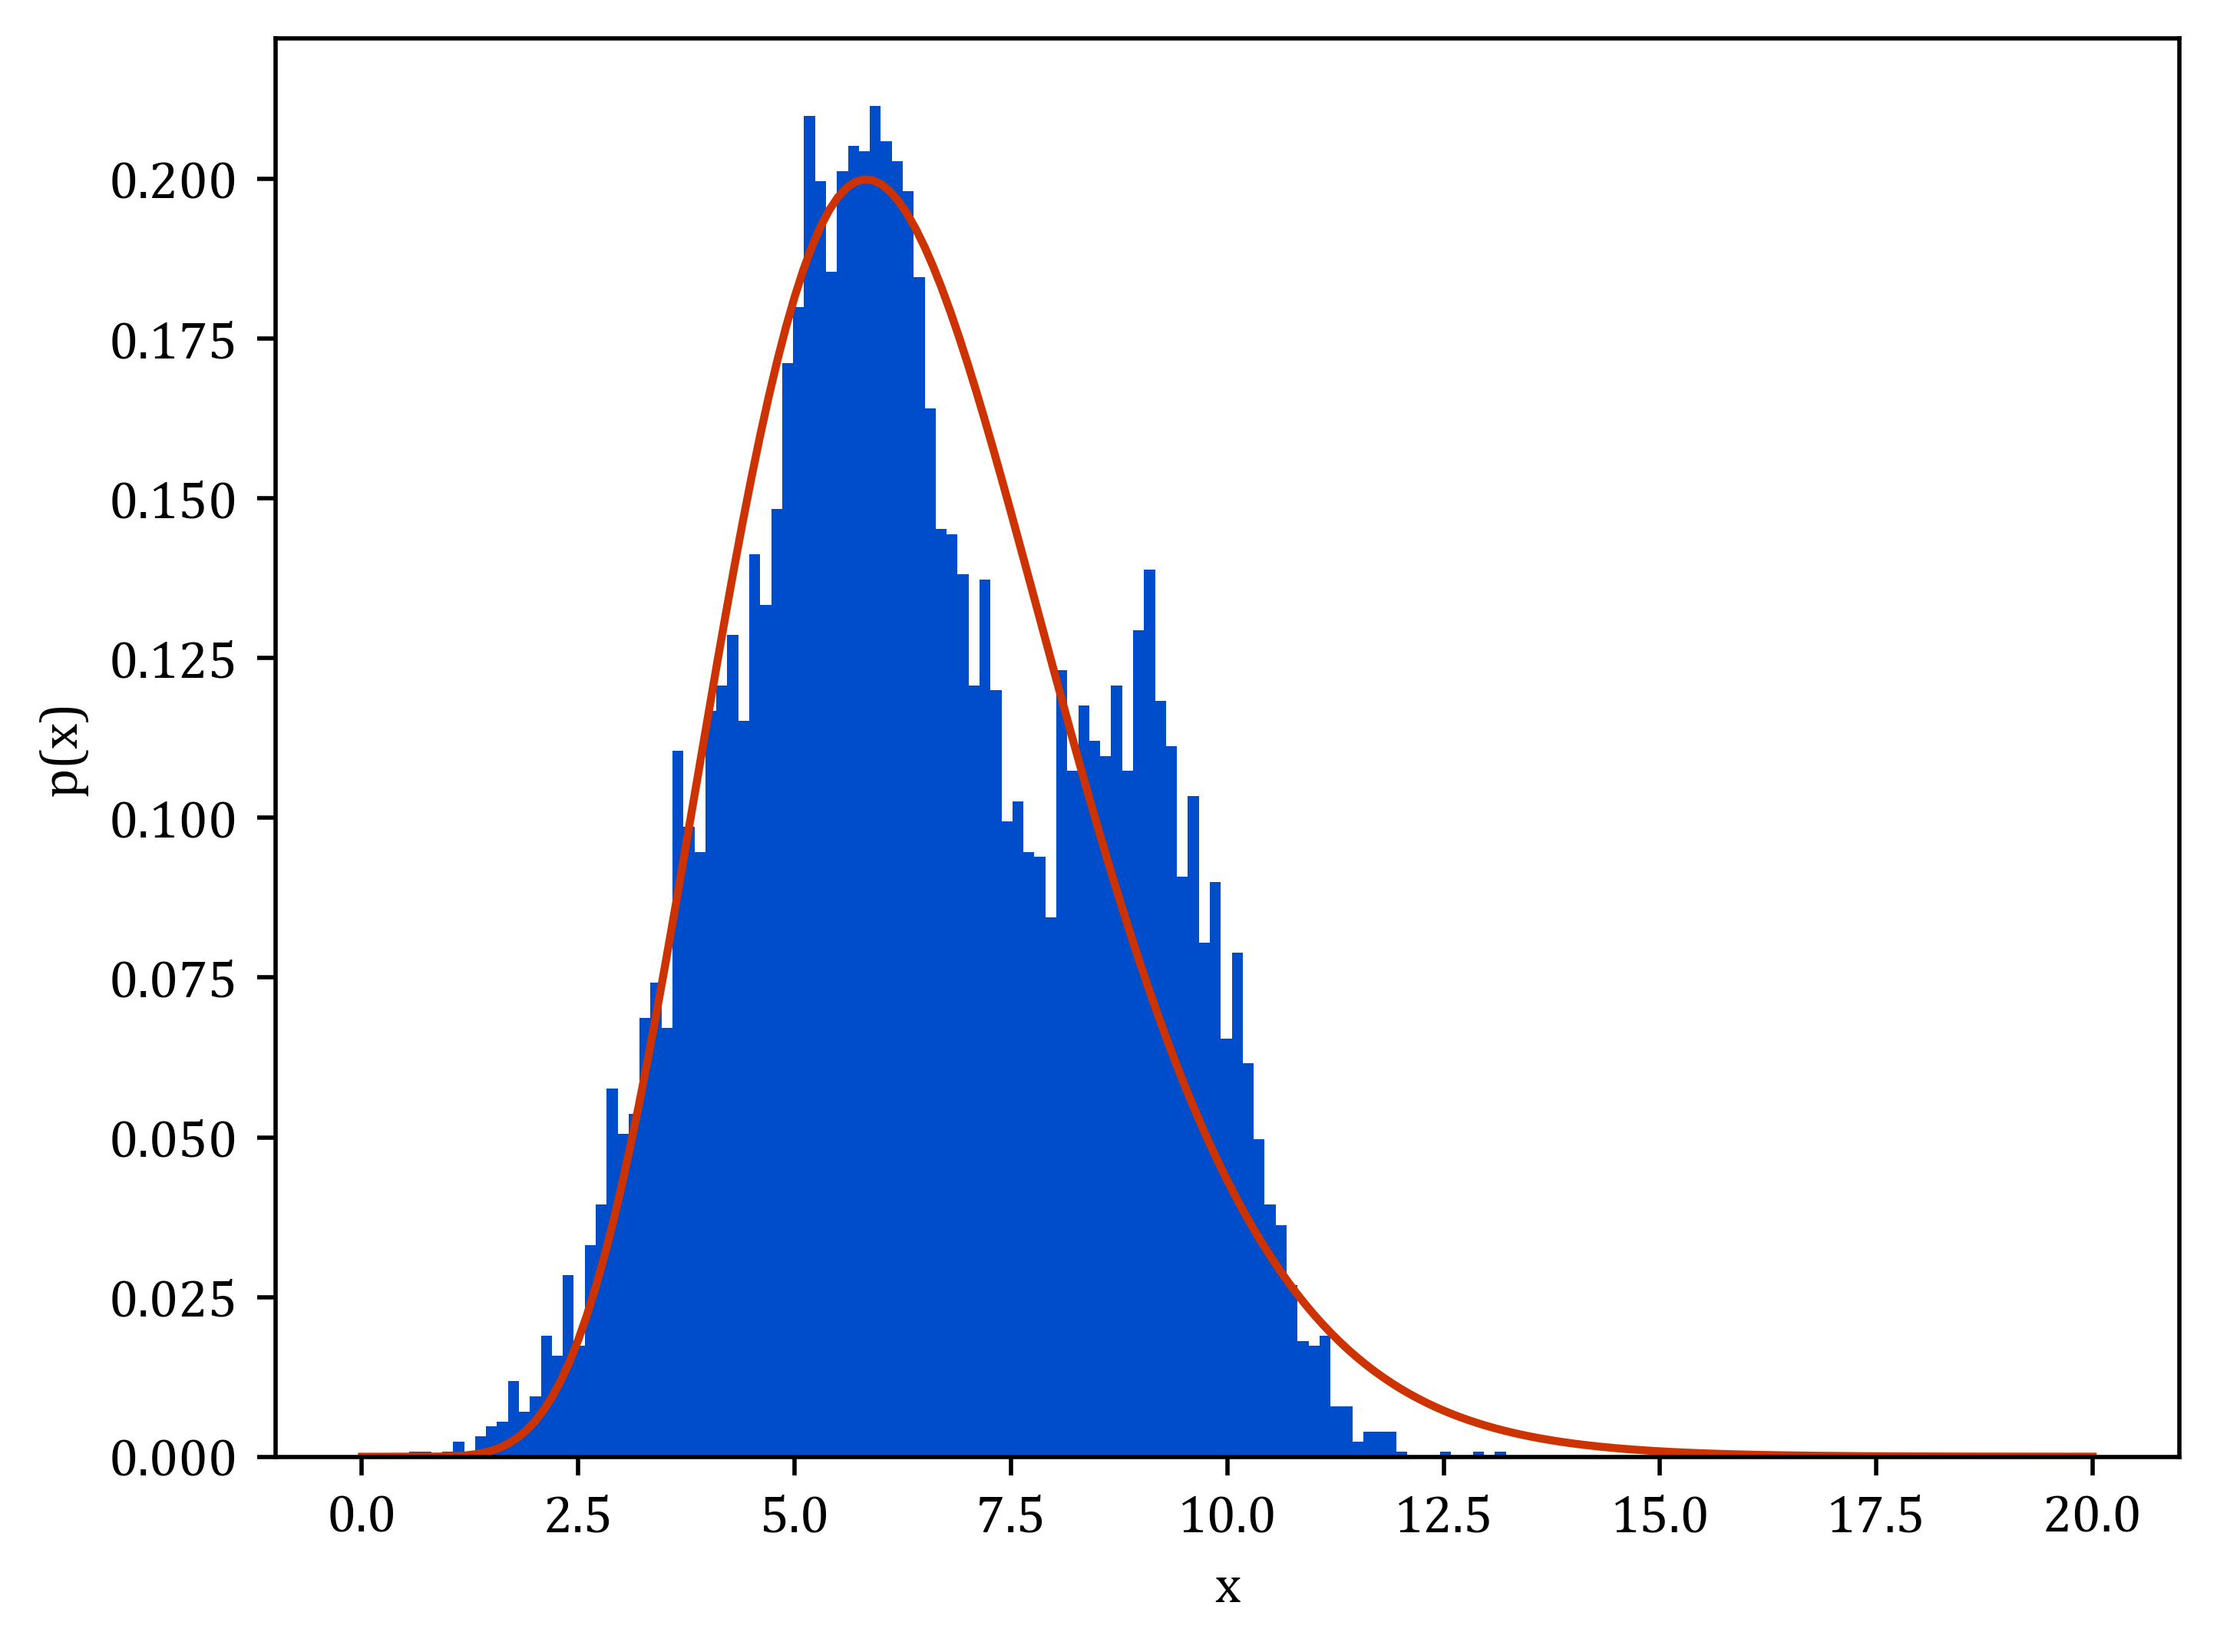

In [9]:
def func_d(x):
    return [x[0] * x[1] - m1, x[0] * (x[0] + 1) * x[1] * x[1] - m2]


est = np.array([1, 0])

root = scipy.optimize.fsolve(func_d, est)
k = root[0]
theta = root[1]
print(root, k, theta)

var_freq = 200
var = np.linspace(0, 20, var_freq + 1)
gamma = scipy.stats.gamma.pdf(var, k, 0, theta)

plt.figure(dpi=500)
plt.plot(var, gamma, color=(0.8, 0.2, 0))
plt.hist(D, 100, density=True, histtype="bar", color=(0, 0.3, 0.8))
plt.xlabel("x")
plt.ylabel("p(x)")

plt.show()

# plt.savefig("3d.png", dpi=300)
# plt.close()

## Task E

Binomial (v/s) Gamma

In [10]:
# Average log-likelihood of binomial distribution
rnd = np.round(D)
probs = scipy.stats.binom.pmf(rnd, n, p)
L_bin = np.sum(np.log(probs)) / D.size
print("Avg. log-likelihood of binomial distribution:", L_bin)

# Average log-likelihood of gamma distribution
probs = scipy.stats.gamma.pdf(D, k, 0, theta)
L_gamma = np.sum(np.log(probs)) / D.size
print("Avg. log-likelihood of gamma  distribution:", L_gamma)

# The binomial distribution was a better fit

Avg. log-likelihood of binomial distribution: -2.1570681154346776
Avg. log-likelihood of gamma  distribution: -2.1608217722066656


## Task F

m3 = 360.56586952543273
m4 = 2968.068491427333
mu1* = 5.129607694285426, mu2* = 8.774363054416439, p1* = 0.6118740341610799, p2* = 0.38264565119273974


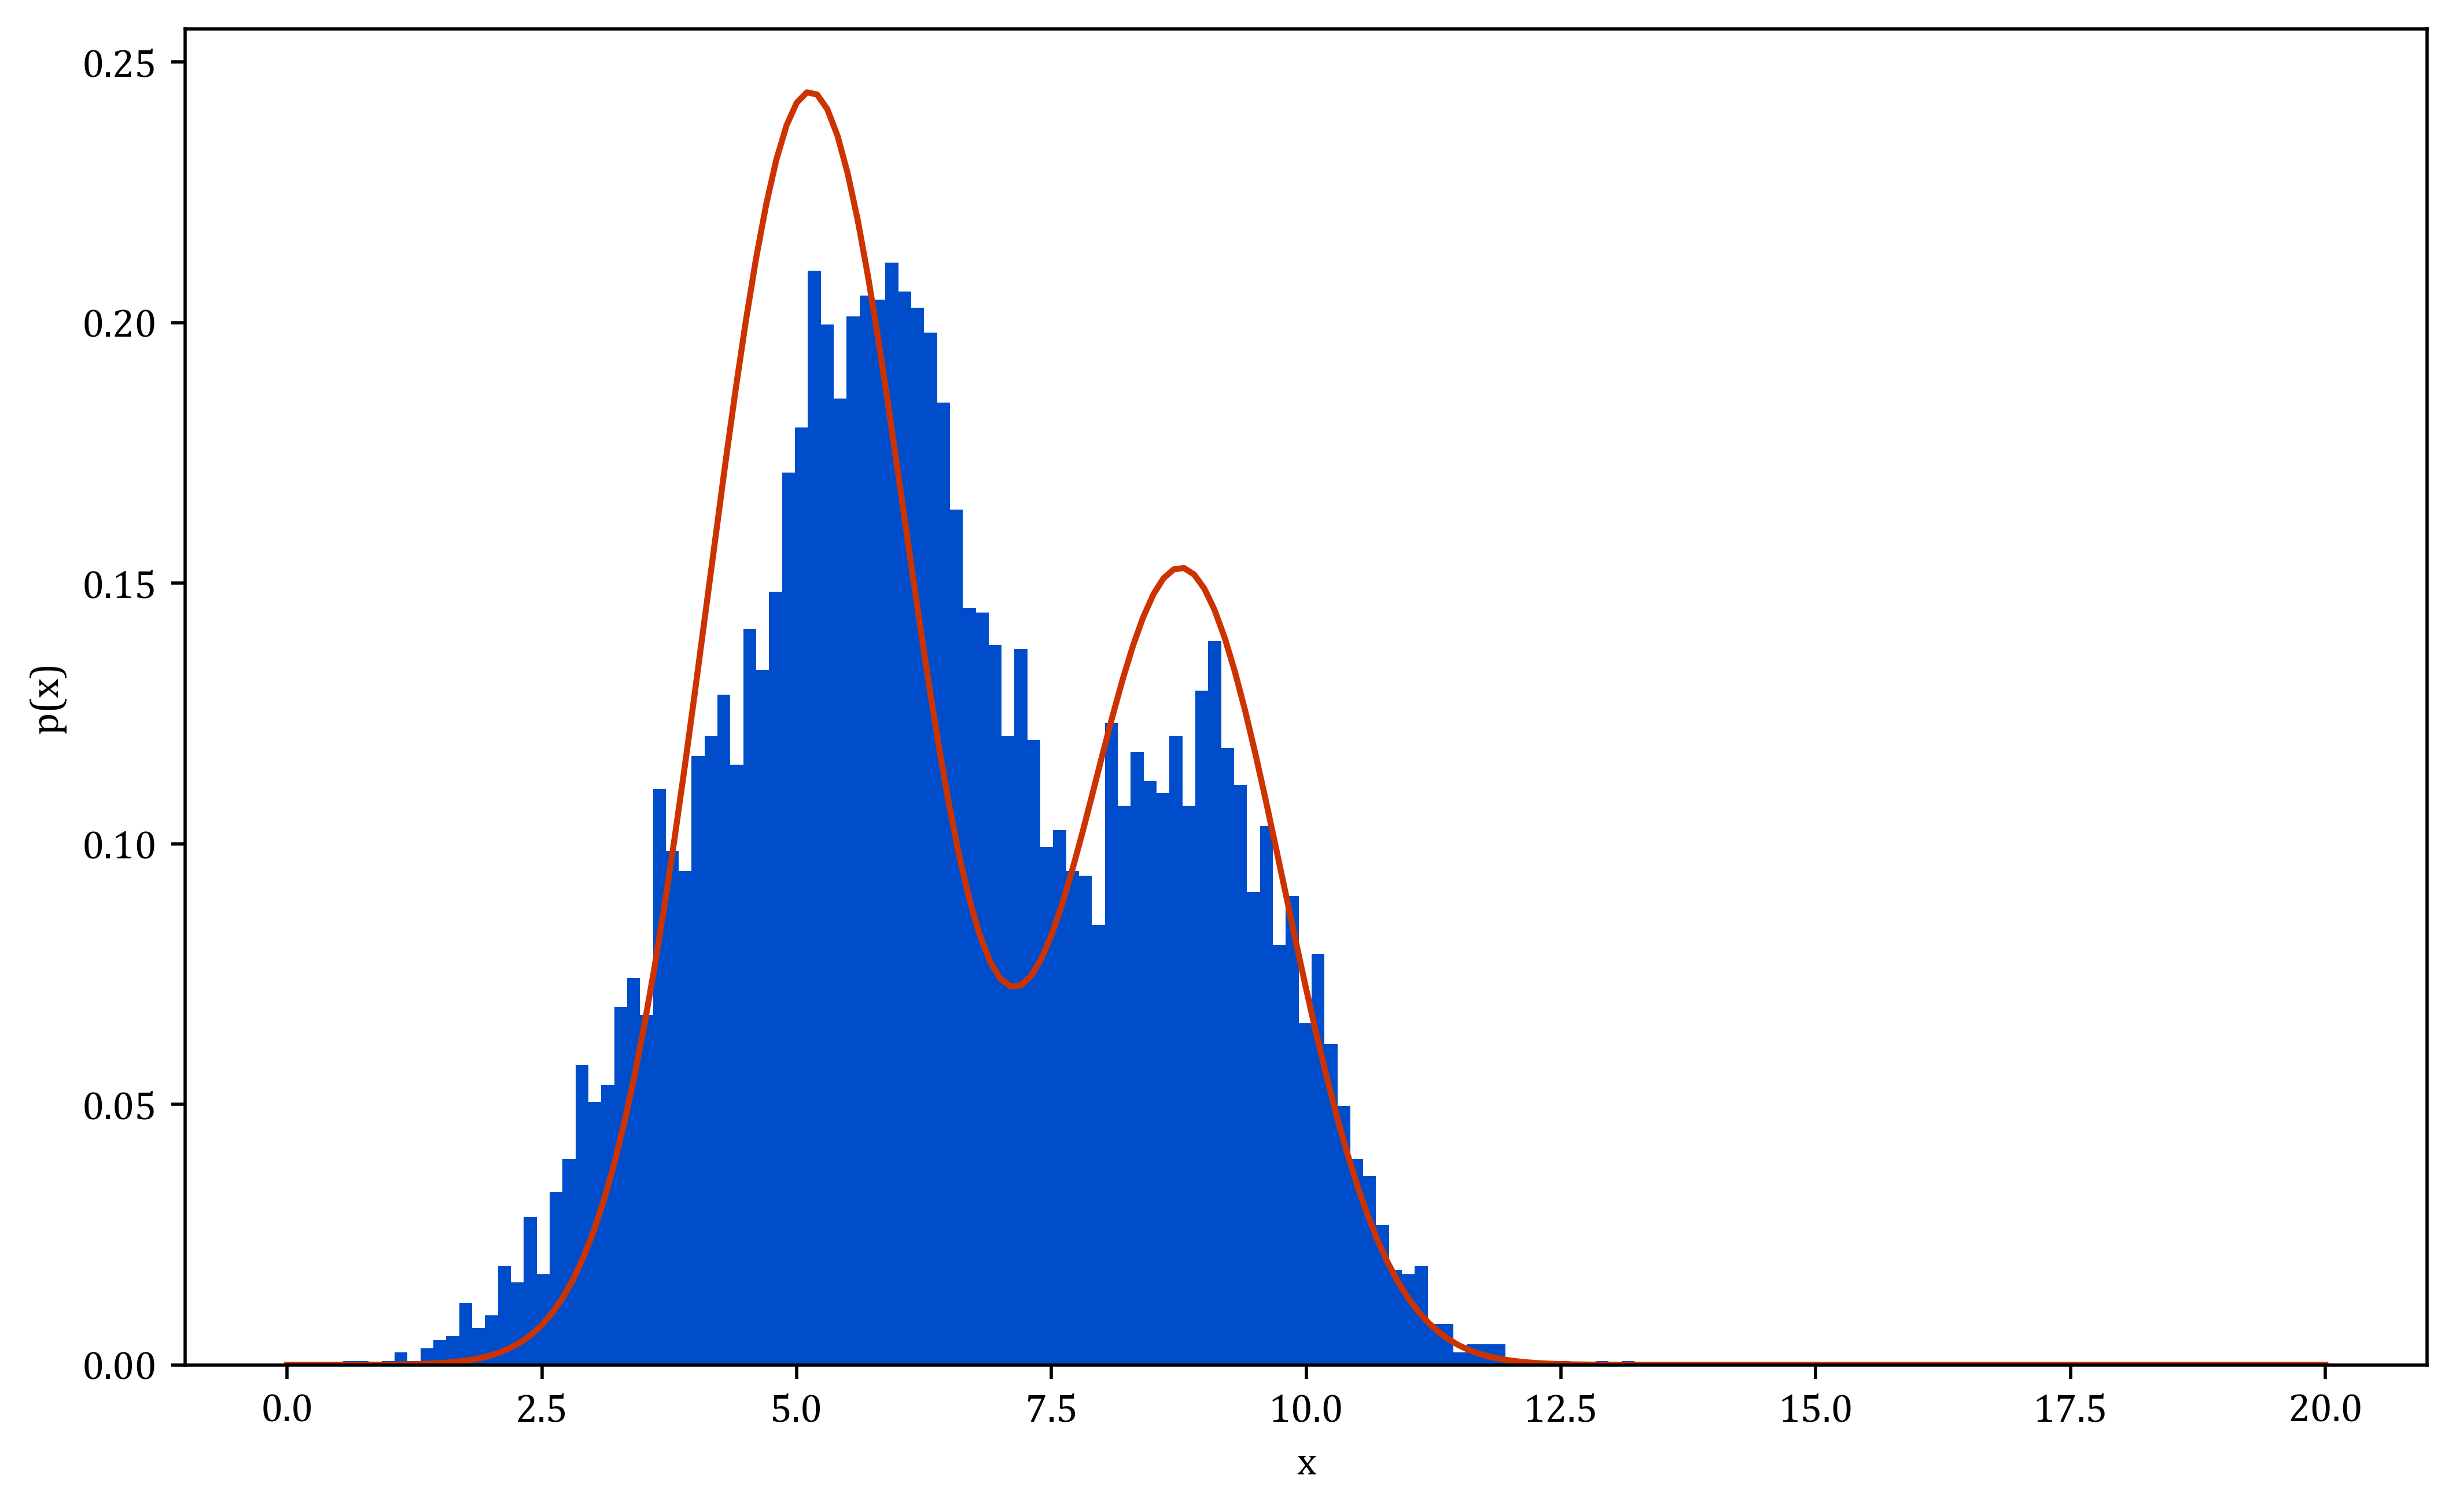

Avg. negative log-likelihood of the GMM distribution: 2.1830387449113124


In [11]:
m3 = np.sum(np.power(D, 3)) / D.size
m4 = np.sum(np.power(D, 4)) / D.size
print(f"m3 = {m3}\nm4 = {m4}")


def func_f(x):
    return [x[0] * x[1] + x[2] * x[3] - m1,
            x[1] * (np.power(x[0], 2) + 1) + x[3] * (np.power(x[2], 2) + 1) - m2,
            x[1] * (np.power(x[0], 3) + 3 * x[0]) + x[3] * (np.power(x[2], 3) + 3 * x[2]) - m3,
            x[1] * (np.power(x[0], 4) + 6 * np.power(x[0], 2) + 3) + x[3] * (
                    np.power(x[2], 4) + 6 * np.power(x[2], 2) + 3) - m4]


est = [5, 0, 7, 0]
mu1, p1, mu2, p2 = scipy.optimize.fsolve(func_f, est)
print(f"mu1* = {mu1}, mu2* = {mu2}, p1* = {p1}, p2* = {p2}")

var_freq = 200
var = np.linspace(0, 20, var_freq + 1)
gmm = p1 * scipy.stats.norm.pdf(var, mu1, 1) + p2 * scipy.stats.norm.pdf(var, mu2, 1)

plt.figure(figsize=(10, 6), dpi=500)
plt.plot(var, gmm, color=(0.8, 0.2, 0))
plt.hist(D, 100, density=True, histtype="bar", color=(0, 0.3, 0.8))
plt.xlabel("x")
plt.ylabel("p(x)")

plt.show()

# plt.savefig("3f.png", dpi=300)
# plt.close()

probs = p1 * scipy.stats.norm.pdf(D, mu1, 1) + p2 * scipy.stats.norm.pdf(D, mu2, 1)
neg_L_gmm = -np.sum(np.log(probs)) / D.size
print("Avg. negative log-likelihood of the GMM distribution:", neg_L_gmm)

# The binomial distribution is still the better fit

## Bonus Task

Using `gaussian_kde` and `sklearn` to speed up the 

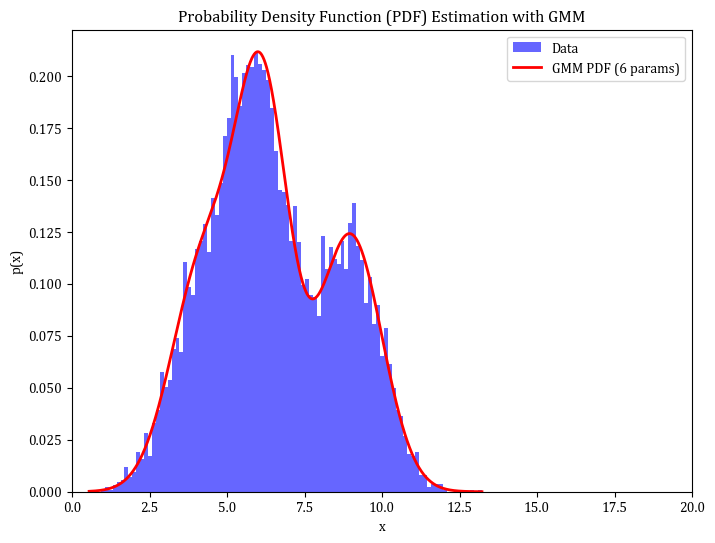

In [12]:
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture

kde = gaussian_kde(D, bw_method='scott')

x_values = np.linspace(min(D), max(D), 1000)
pdf_values = kde(x_values)

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(D.reshape(-1, 1))

means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()
weights = gmm.weights_

gmm_pdf_values = np.zeros_like(x_values)
for weight, mean, var in zip(weights, means, variances):
    gmm_pdf_values += weight * np.exp(-0.5 * ((x_values - mean) ** 2) / var) / np.sqrt(2 * np.pi * var)

plt.figure(figsize=(8, 6))
plt.hist(D, bins=100, density=True, alpha=0.6, color='b', label='Data')
# plt.plot(x_values, pdf_values, color='blue', lw=2, label='Estimated KDE')
plt.plot(x_values, gmm_pdf_values, color='r', lw=2, label='GMM PDF (6 params)')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.title('Probability Density Function (PDF) Estimation with GMM')

plt.show()
